# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [2]:
!pip install folium

In [3]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [6]:
data = pd.read_csv('train2.csv')

In [8]:
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [9]:
X = data.drop('dropoff_datetime', axis=1)
y = X.pop('trip_duration')

In [10]:
X.pickup_datetime = pd.to_datetime(X.pickup_datetime)
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)

In [11]:
X.pickup_datetime.dtype.name

'datetime64[ns]'

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

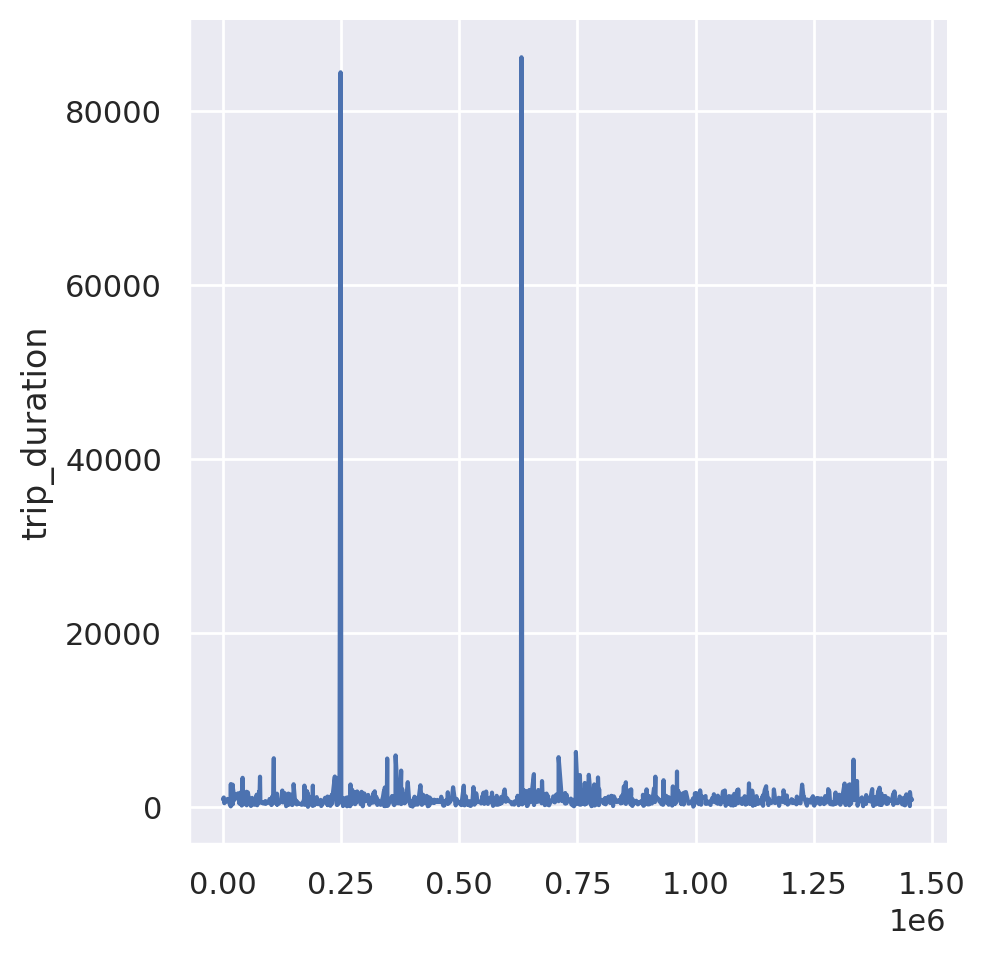

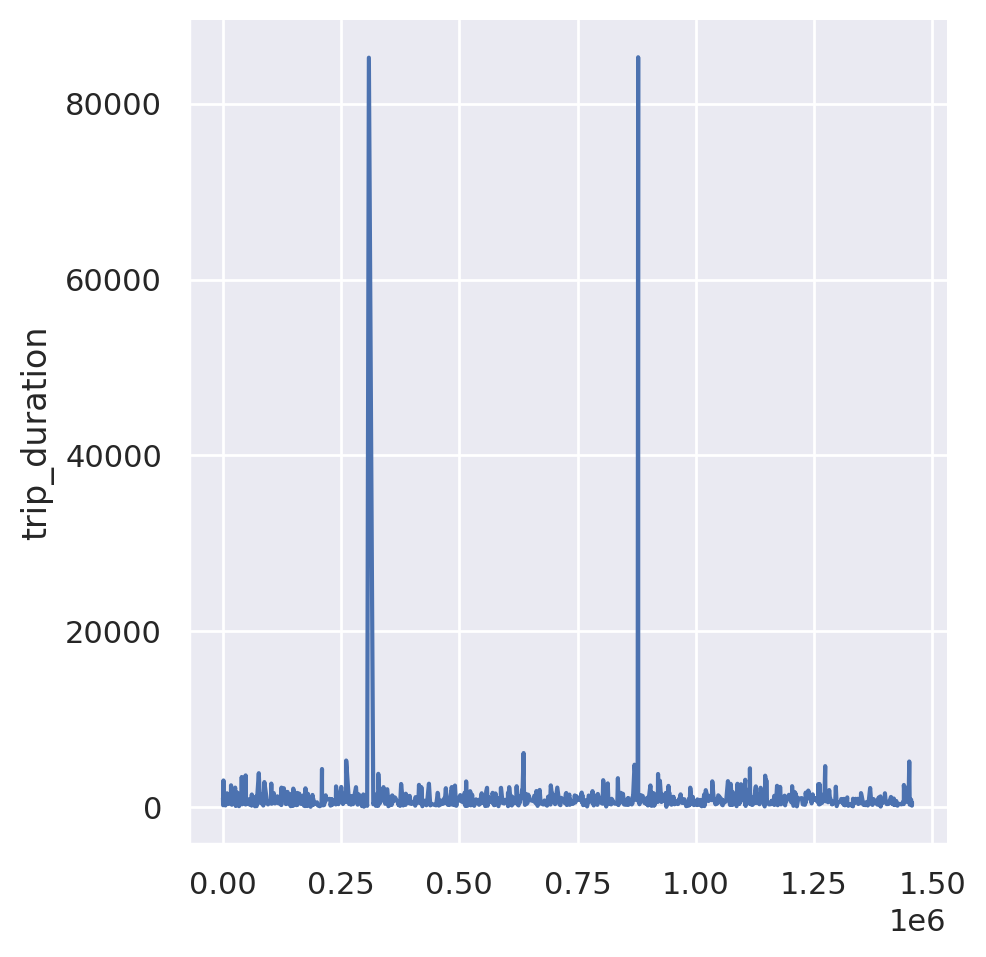

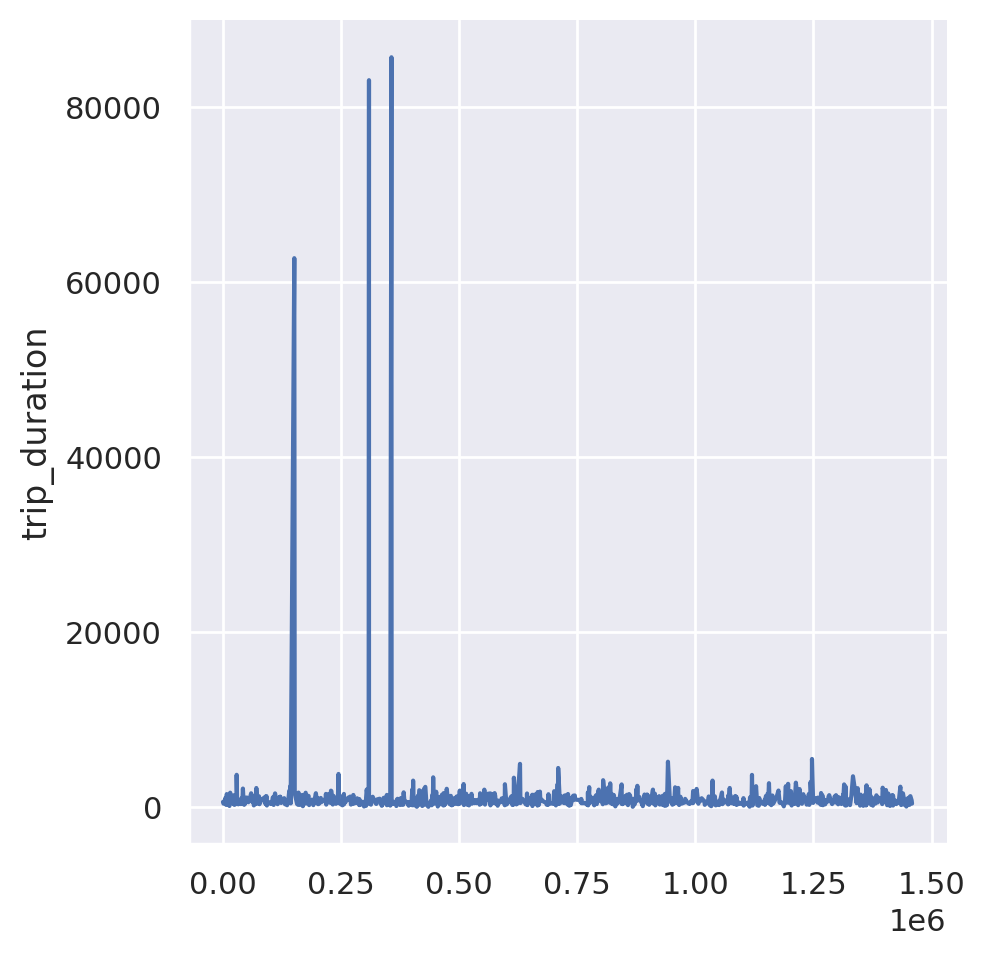

In [14]:
sns.relplot(data=y.sample(1000), kind='line')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: Имеются выбросы, затрудняющие анализ

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [10]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])

<Axes: xlabel='log_trip_duration', ylabel='Count'>

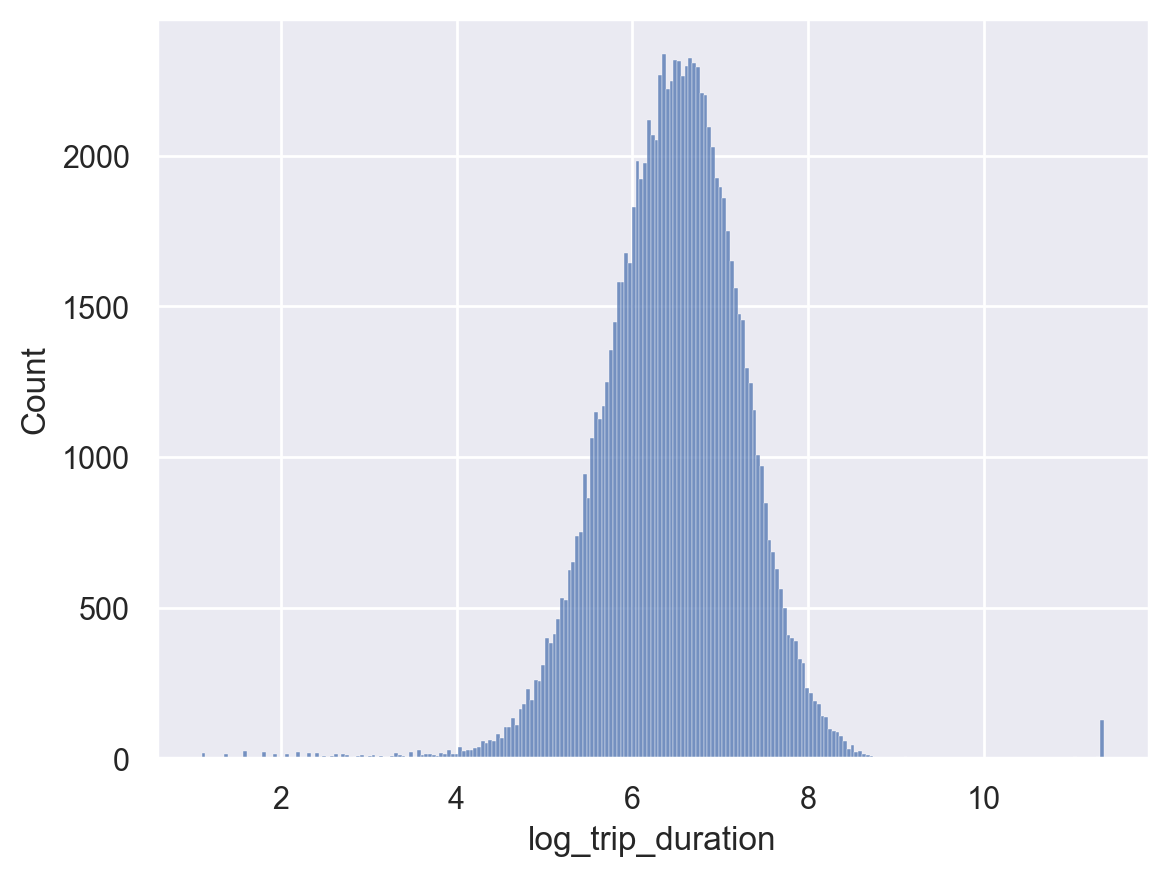

In [11]:
sns.histplot(data['log_trip_duration'].sample(100000))

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
y = data['log_trip_duration']
y.describe()

count    1.458644e+06
mean     6.466978e+00
std      7.957595e-01
min      6.931472e-01
25%      5.986452e+00
50%      6.496775e+00
75%      6.981006e+00
max      1.507575e+01
Name: log_trip_duration, dtype: float64

In [13]:
def rmsle(log1p_y_true, log1p_y_pred):
    new = log1p_y_true - log1p_y_pred
    new = new ** 2
    return np.sqrt((1 / len(log1p_y_pred)) * new.sum())

rmsle_best_const = y.std() 
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957595093149208


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

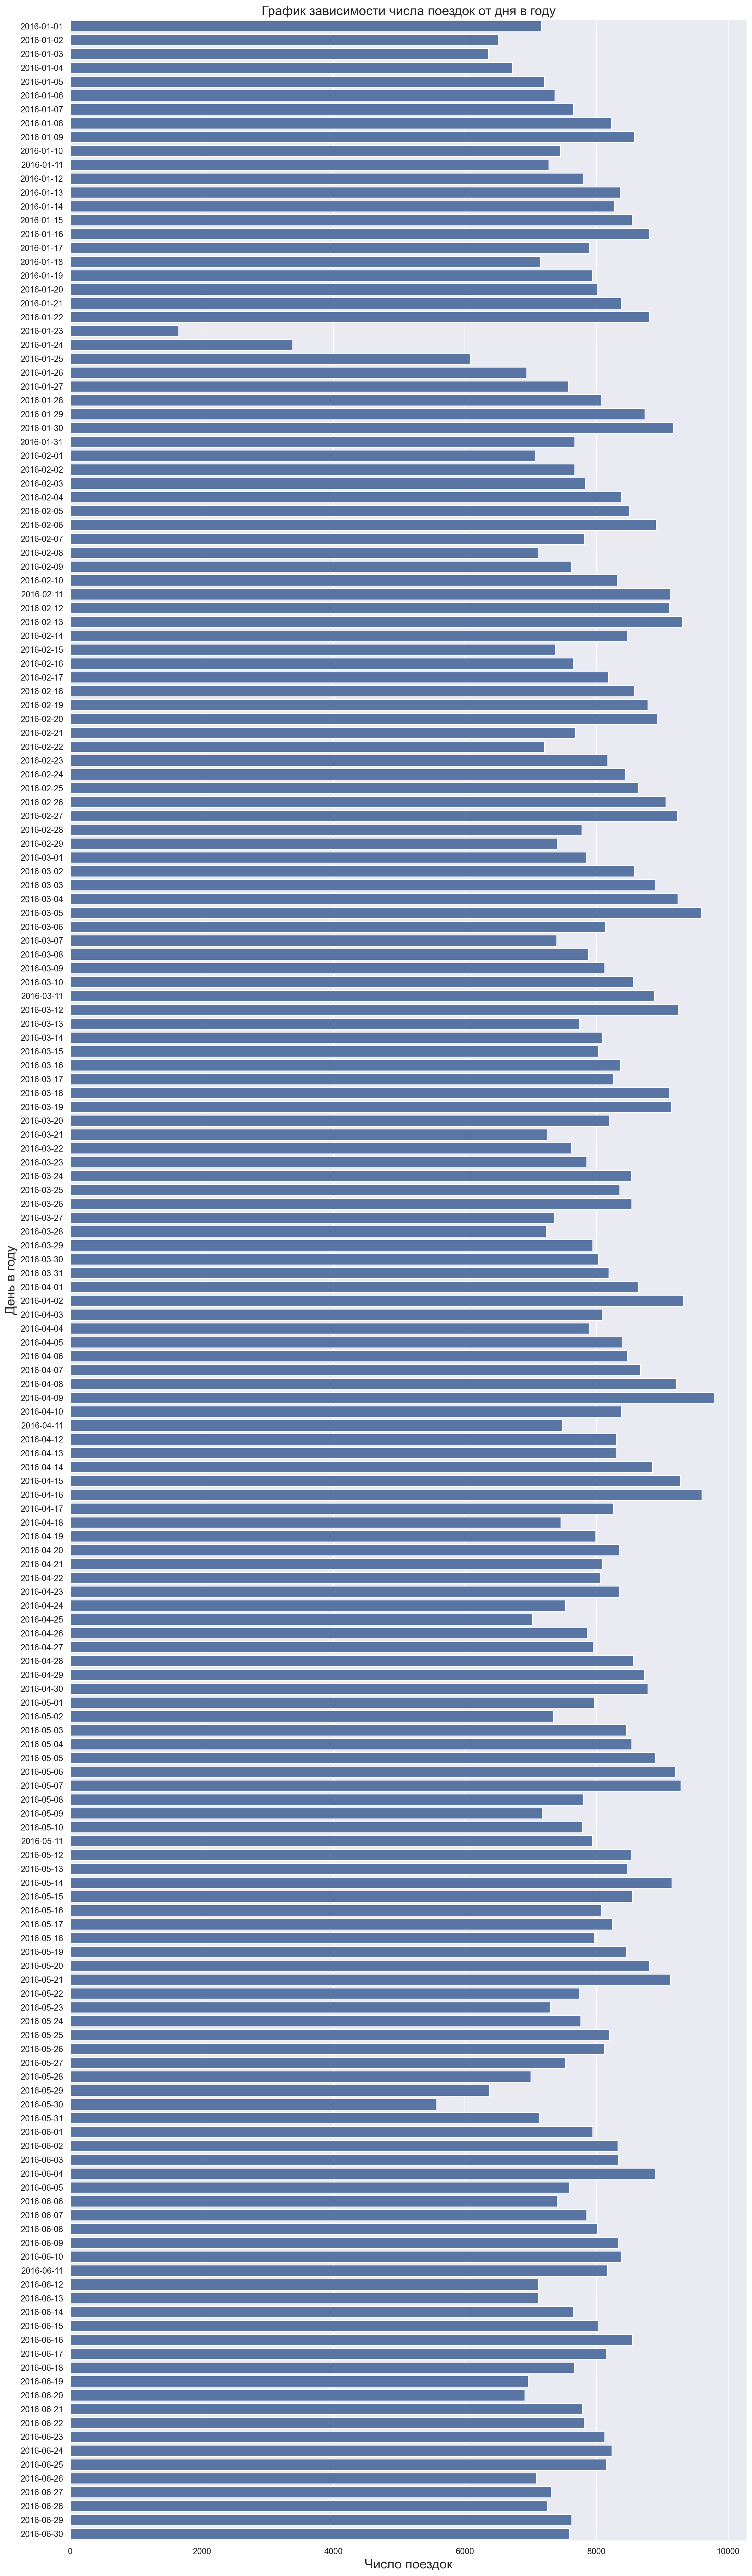

In [14]:
# from datetime import datetime

plt.figure(figsize=(16,60))
sns.countplot(X['pickup_datetime'].dt.date.sort_values())
plt.title("График зависимости числа поездок от дня в году", fontsize=17)
plt.ylabel("День в году", fontsize=17)
plt.xlabel("Число поездок", fontsize=17)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**:
1) 2016-01-23 и 2016-01-24 в Нью-Йорке была снежная буря, во время которой запретили движение транспорта
          
2) 2016-05-30 в реку Гудзон упал легкомоторный самолет, в связи с этим были перекрыты некоторые улицы для проведения поисково спасательных работ. Также проводился День Поминовения ( Memorial Day) — национальный день памяти США
           
Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

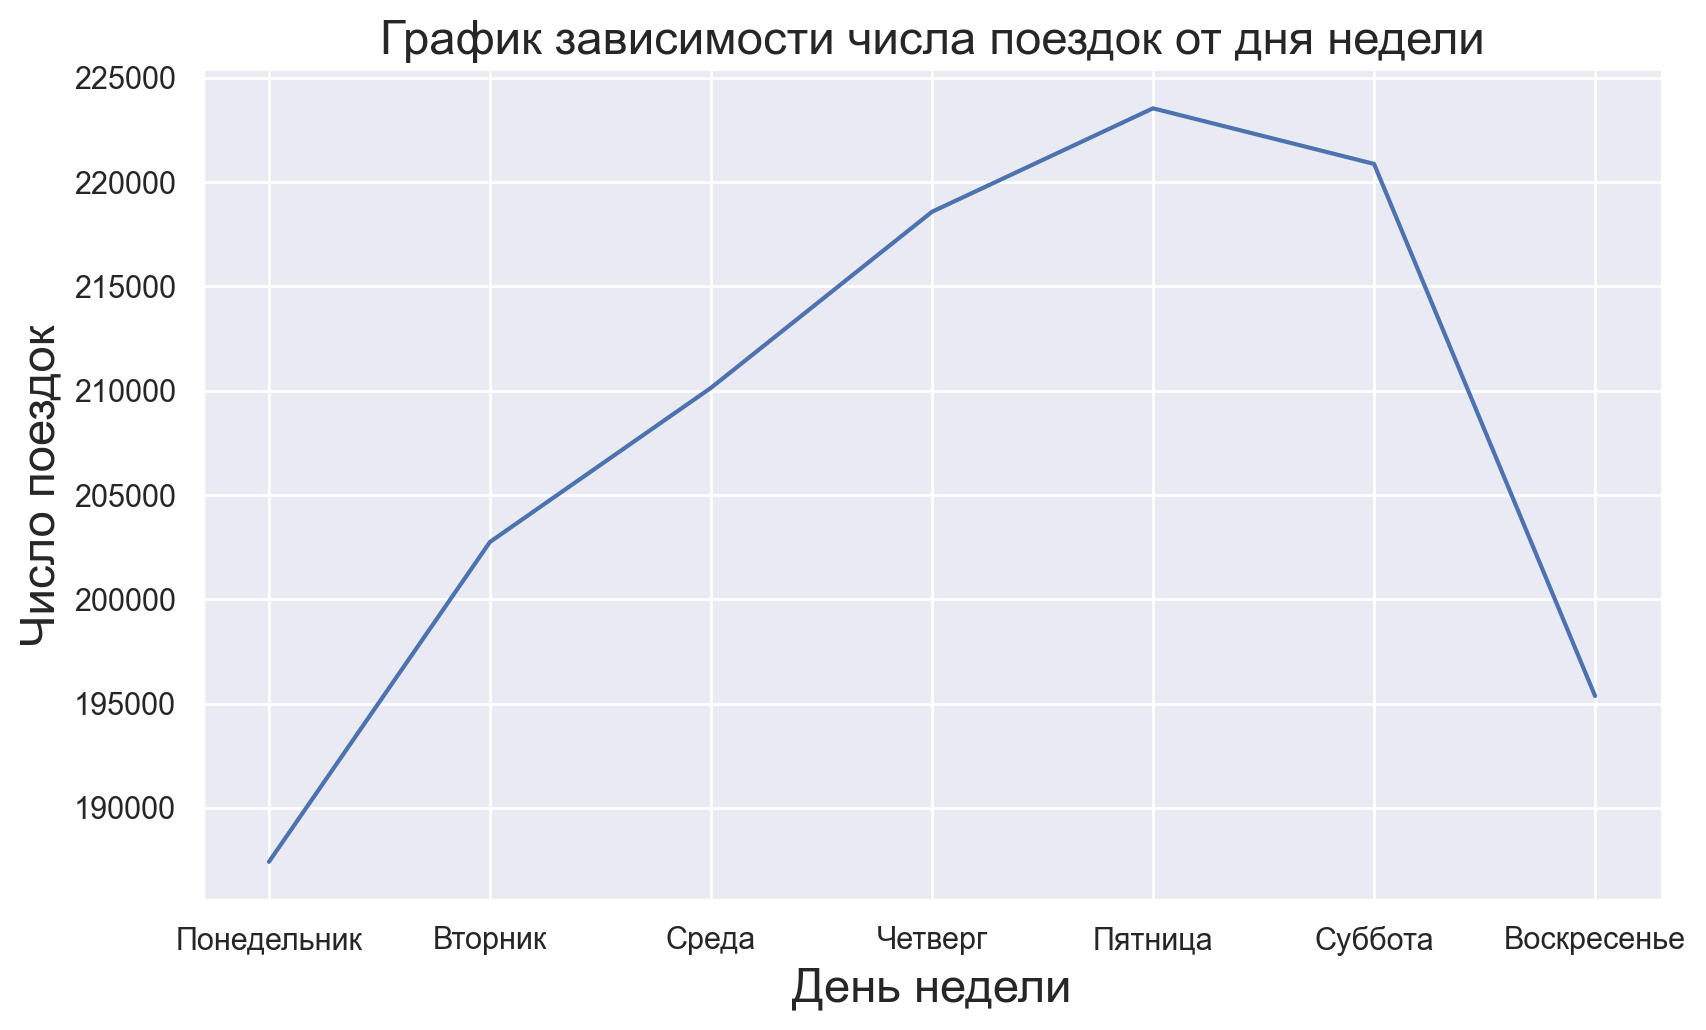

In [15]:
sns.relplot(X['pickup_datetime'].dt.weekday.value_counts(), kind='line', aspect=1.7)
plt.title("График зависимости числа поездок от дня недели", fontsize=17)
plt.xlabel("День недели", fontsize=17)
plt.ylabel("Число поездок", fontsize=17)
plt.xticks(ticks=np.arange(0, 7), labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()

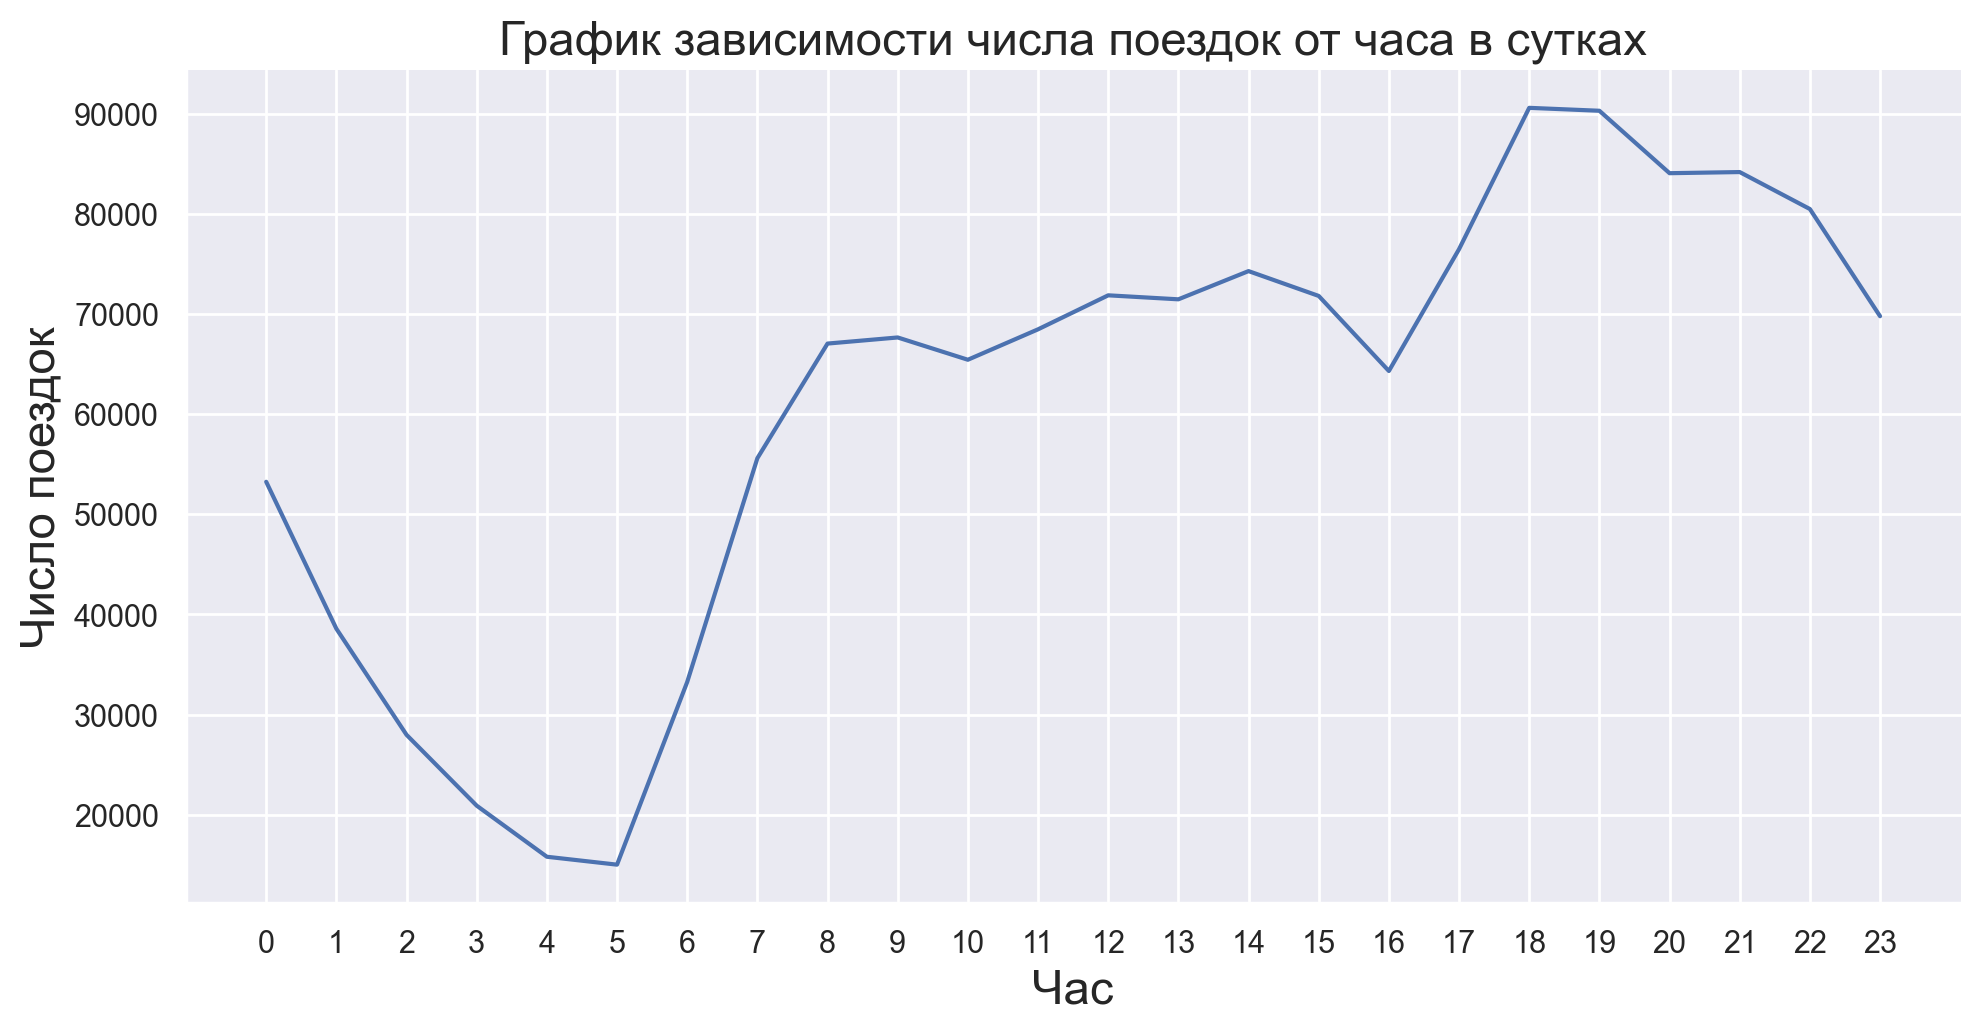

In [16]:
%config InlineBackend.figure_format = 'retina'

sns.relplot(X['pickup_datetime'].dt.hour.value_counts(), kind='line', aspect=2)
plt.title("График зависимости числа поездок от часа в сутках", fontsize=17)
plt.xlabel("Час", fontsize=17)
plt.ylabel("Число поездок", fontsize=17)
plt.xticks(ticks=np.arange(0, 24))
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [17]:
date_wide = X['pickup_datetime'].to_frame()
date_wide['Month'] = X['pickup_datetime'].dt.month
date_wide['Hour'] = X['pickup_datetime'].dt.hour

date_wide.head()

pickup_datetime  Month  Hour
0 2016-03-14 17:24:55      3    17
1 2016-06-12 00:43:35      6     0
2 2016-01-19 11:35:24      1    11
3 2016-04-06 19:32:31      4    19
4 2016-03-26 13:30:55      3    13

In [18]:
new = date_wide.groupby(['Month', 'Hour']).count().reset_index()
new

Month  Hour  pickup_datetime
0        1     0             8330
1        1     1             6400
2        1     2             4830
3        1     3             3574
4        1     4             2612
..     ...   ...              ...
139      6    19            14187
140      6    20            12799
141      6    21            13740
142      6    22            13391
143      6    23            11899

[144 rows x 3 columns]

При работе с данным графиком возникли сложности с составлением легенды, так как встроенная легенда seaborn не была удобна, хотел добавить ее через стандартную plt.legend(), но на ней ловил баг с отображением линий, чтобы нормально задать линии в легенде необходимо использовать g.ax.get_legend_handles_labels(), а после отключить стандартную легенду seaborn 

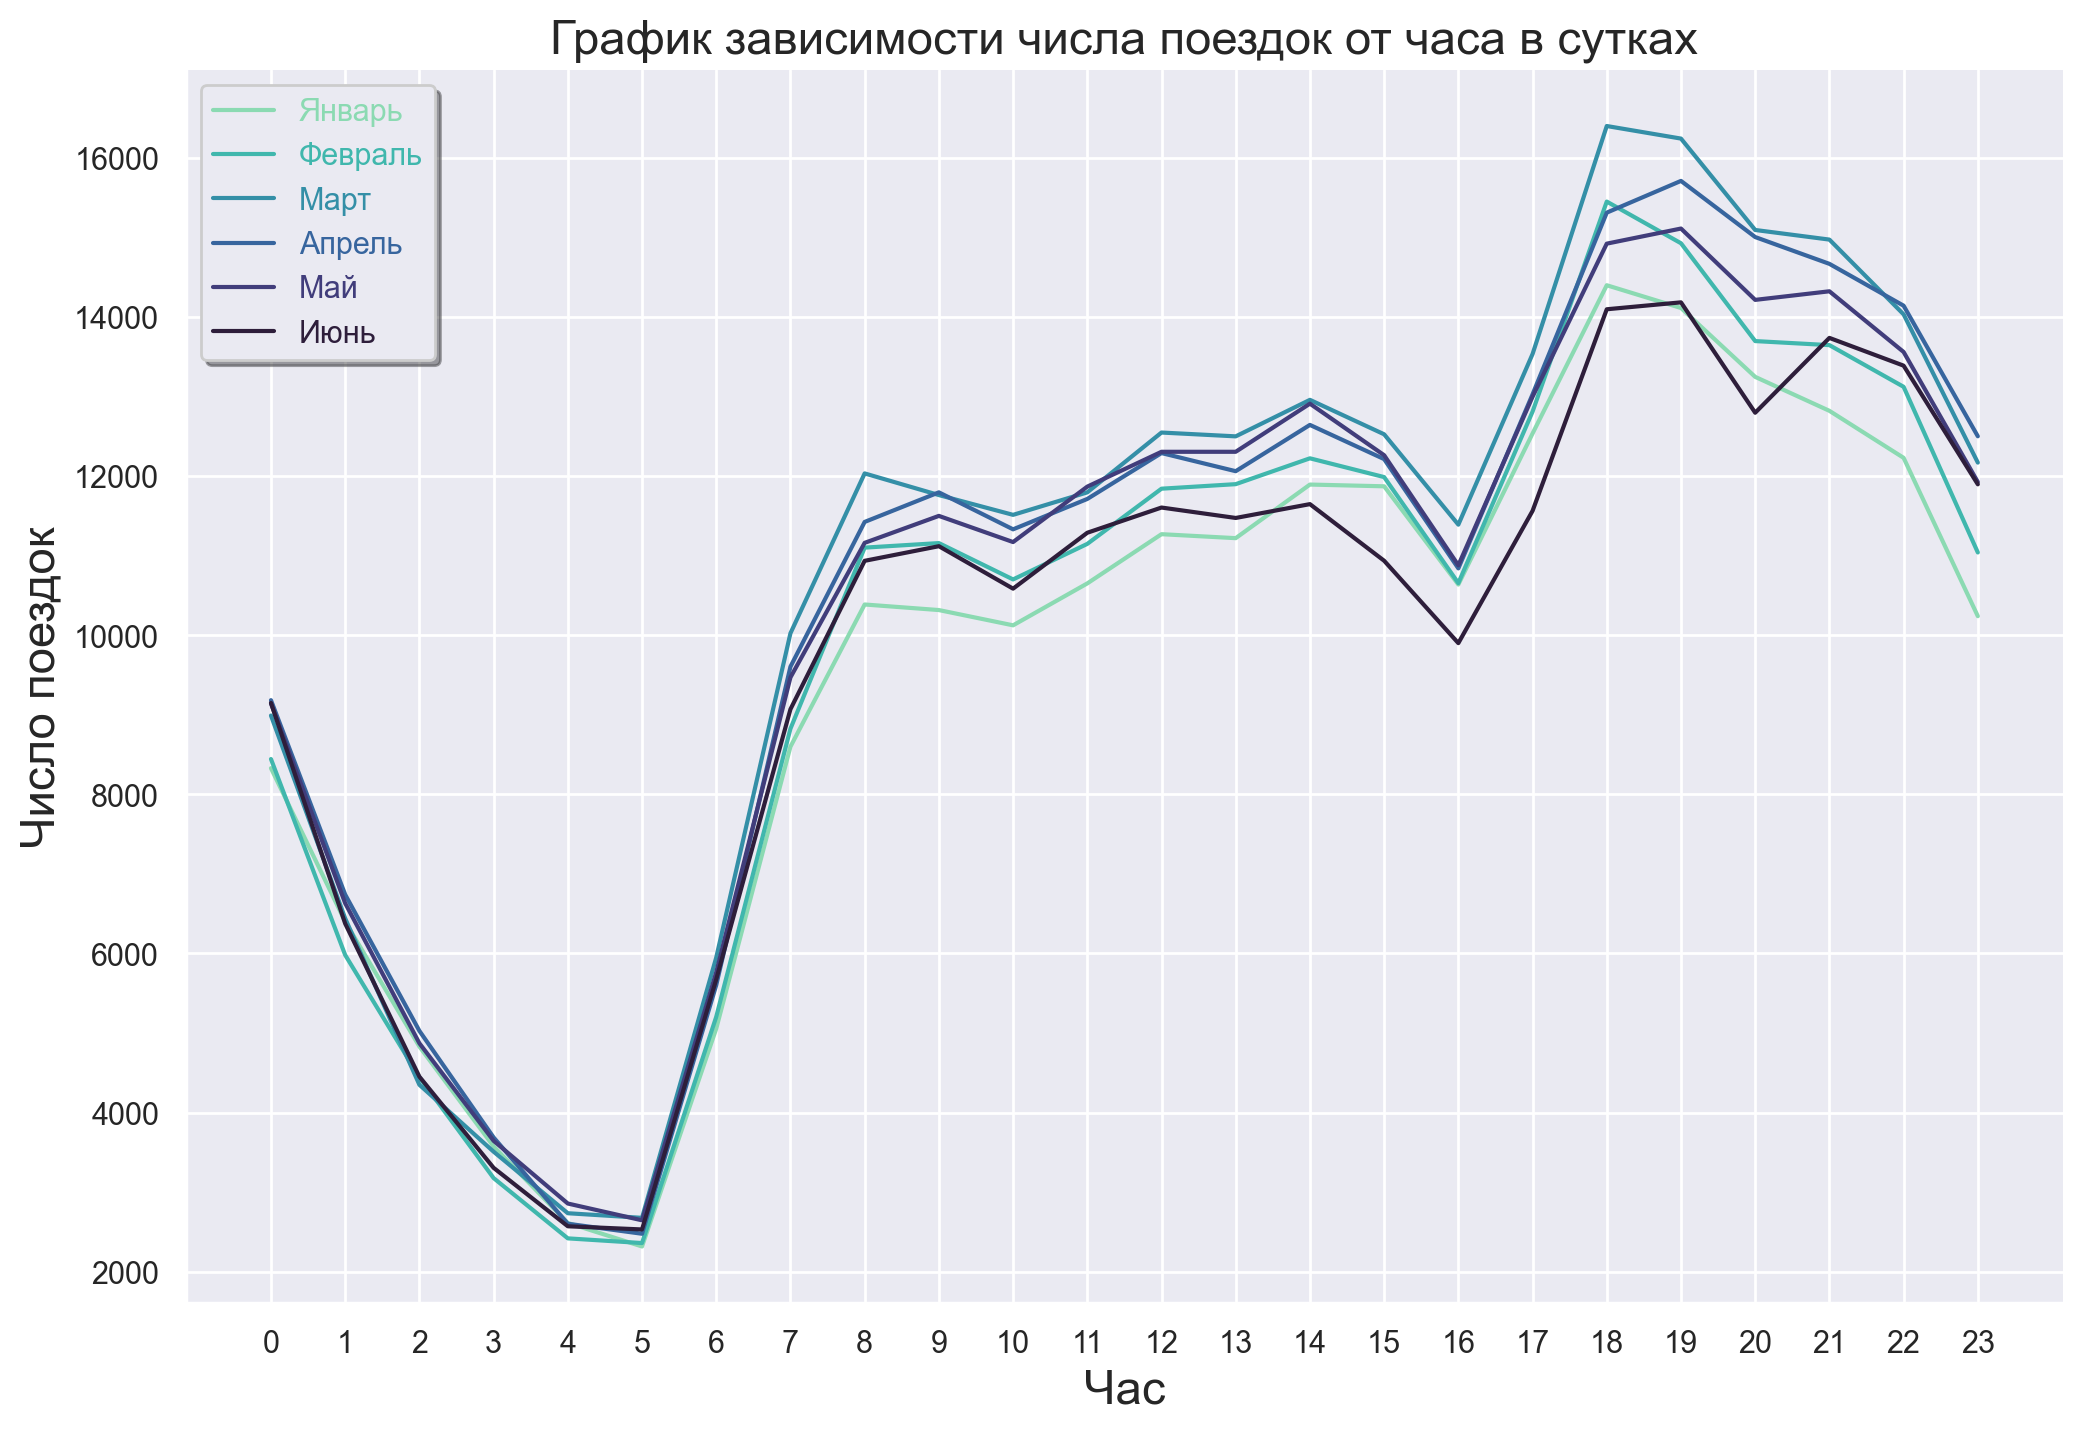

In [19]:
palette = sns.color_palette("mako_r", 6) # палетка цветов, можно передать в аргумент palette и colours
g = sns.relplot(x = 'Hour', y = 'pickup_datetime', kind='line', height=7, aspect=1.5, legend=True, hue='Month', data=new, palette=palette)
plt.title("График зависимости числа поездок от часа в сутках", fontsize=17)
plt.xlabel("Час", fontsize=17)
plt.ylabel("Число поездок", fontsize=17)
plt.xticks(ticks=np.arange(0, 24))
handle, label = g.ax.get_legend_handles_labels() # получаем линии графиков (Artists) и их подписи
g._legend.remove() # убираем стандартную seaborn легенду
plt.legend(handles=handle, labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь'], shadow=True, labelcolor=palette)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Больше всего поездок совершается в 18-19 часов, меньше всего в 4-5, самый нагруженный месяц - Март, при этом нагрузка в Июне смещается ближе к концу дня, все это связано с отправлением / возвращением людей с работы

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, y, random_state = 0, test_size=0.3) # 7 к 3 => 0.7 под train, 0.3 под valid

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

In [21]:
X_train['pickup_datetime']

430252    2016-02-15 00:52:17
598829    2016-03-22 12:04:34
314731    2016-03-14 16:03:08
1342009   2016-01-14 12:02:41
673814    2016-06-26 23:10:20
                  ...        
359783    2016-06-14 22:18:19
152315    2016-03-12 20:53:19
963395    2016-01-03 10:46:02
117952    2016-03-04 08:18:24
305711    2016-03-03 21:49:00
Name: pickup_datetime, Length: 1021050, dtype: datetime64[ns]

In [90]:
train_data = X_train
train_data['log_trip_duration'] = y_train
train_data['Month'] = X_train['pickup_datetime'].dt.month
train_data['Hour'] = X_train['pickup_datetime'].dt.hour
train_data['WeekDay'] = X_train['pickup_datetime'].dt.weekday
train_data['YearDay'] = X_train['pickup_datetime'].dt.strftime('%j').astype(int)
train_data.head()

id  vendor_id     pickup_datetime     dropoff_datetime  \
430252   id2968130          2 2016-02-15 00:52:17  2016-02-15 00:59:42   
598829   id2358444          2 2016-03-22 12:04:34  2016-03-22 12:23:43   
314731   id0408430          2 2016-03-14 16:03:08  2016-03-14 16:03:52   
1342009  id2305944          2 2016-01-14 12:02:41  2016-01-14 12:08:05   
673814   id2198653          1 2016-06-26 23:10:20  2016-06-26 23:17:38   

         passenger_count  pickup_longitude  pickup_latitude  \
430252                 2        -73.934586        40.797016   
598829                 2        -73.957748        40.764500   
314731                 1        -73.982857        40.730961   
1342009                1        -73.982262        40.771389   
673814                 1        -73.991264        40.749748   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
430252          -73.917397         40.834545                  N   
598829          -73.978706         40.758430                  N   
314731          -73.980171         40.734741                  N   
1342009         -73.979973         40.786072                  N   
673814          -73.976517         40.749260                  N   

         trip_duration  log_trip_duration  Month  Hour  WeekDay  YearDay  
430252             445           6.100319      2     0        0       46  
598829            1149           7.047517      3    12        1       82  
314731              44           3.806662      3    16        0       74  
1342009            324           5.783825      1    12        3       14  
673814             438           6.084499      6    23        6      178

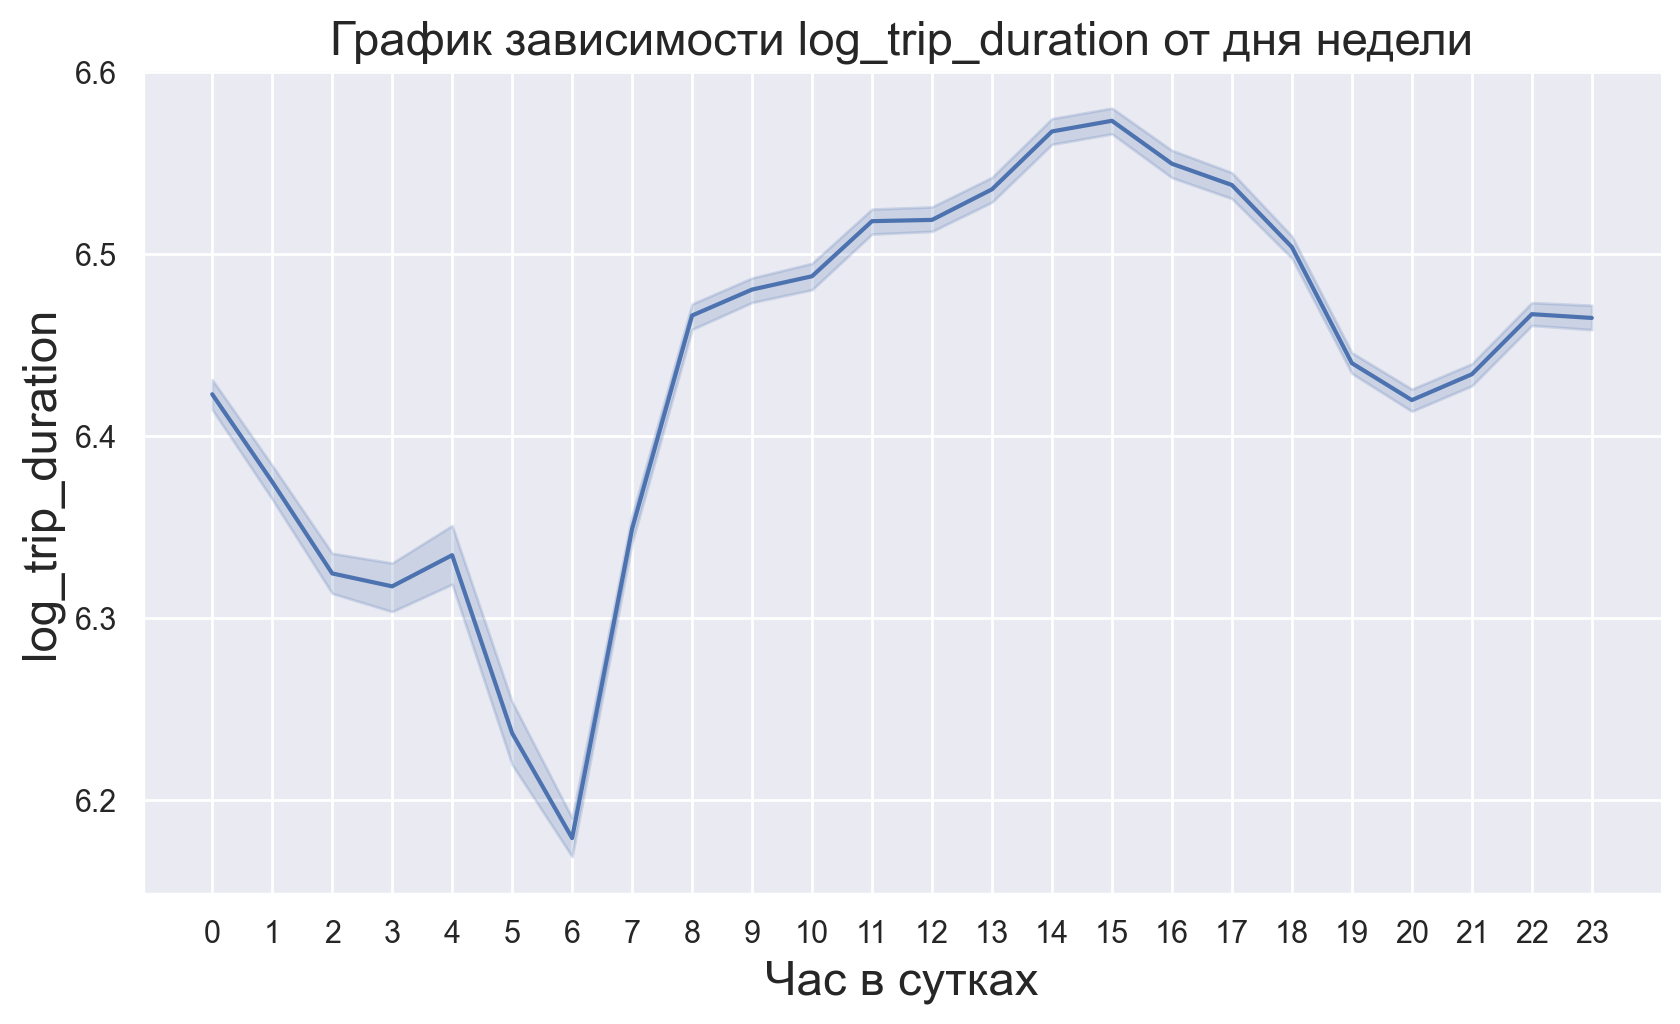

In [23]:
sns.relplot(x = 'Hour', y = 'log_trip_duration', kind='line', aspect=1.7, data=train_data)
plt.title("График зависимости log_trip_duration от часа в сутках", fontsize=17)
plt.xlabel("Час в сутках", fontsize=17)
plt.ylabel("log_trip_duration", fontsize=17)
plt.xticks(ticks=np.arange(0, 24))
plt.show()

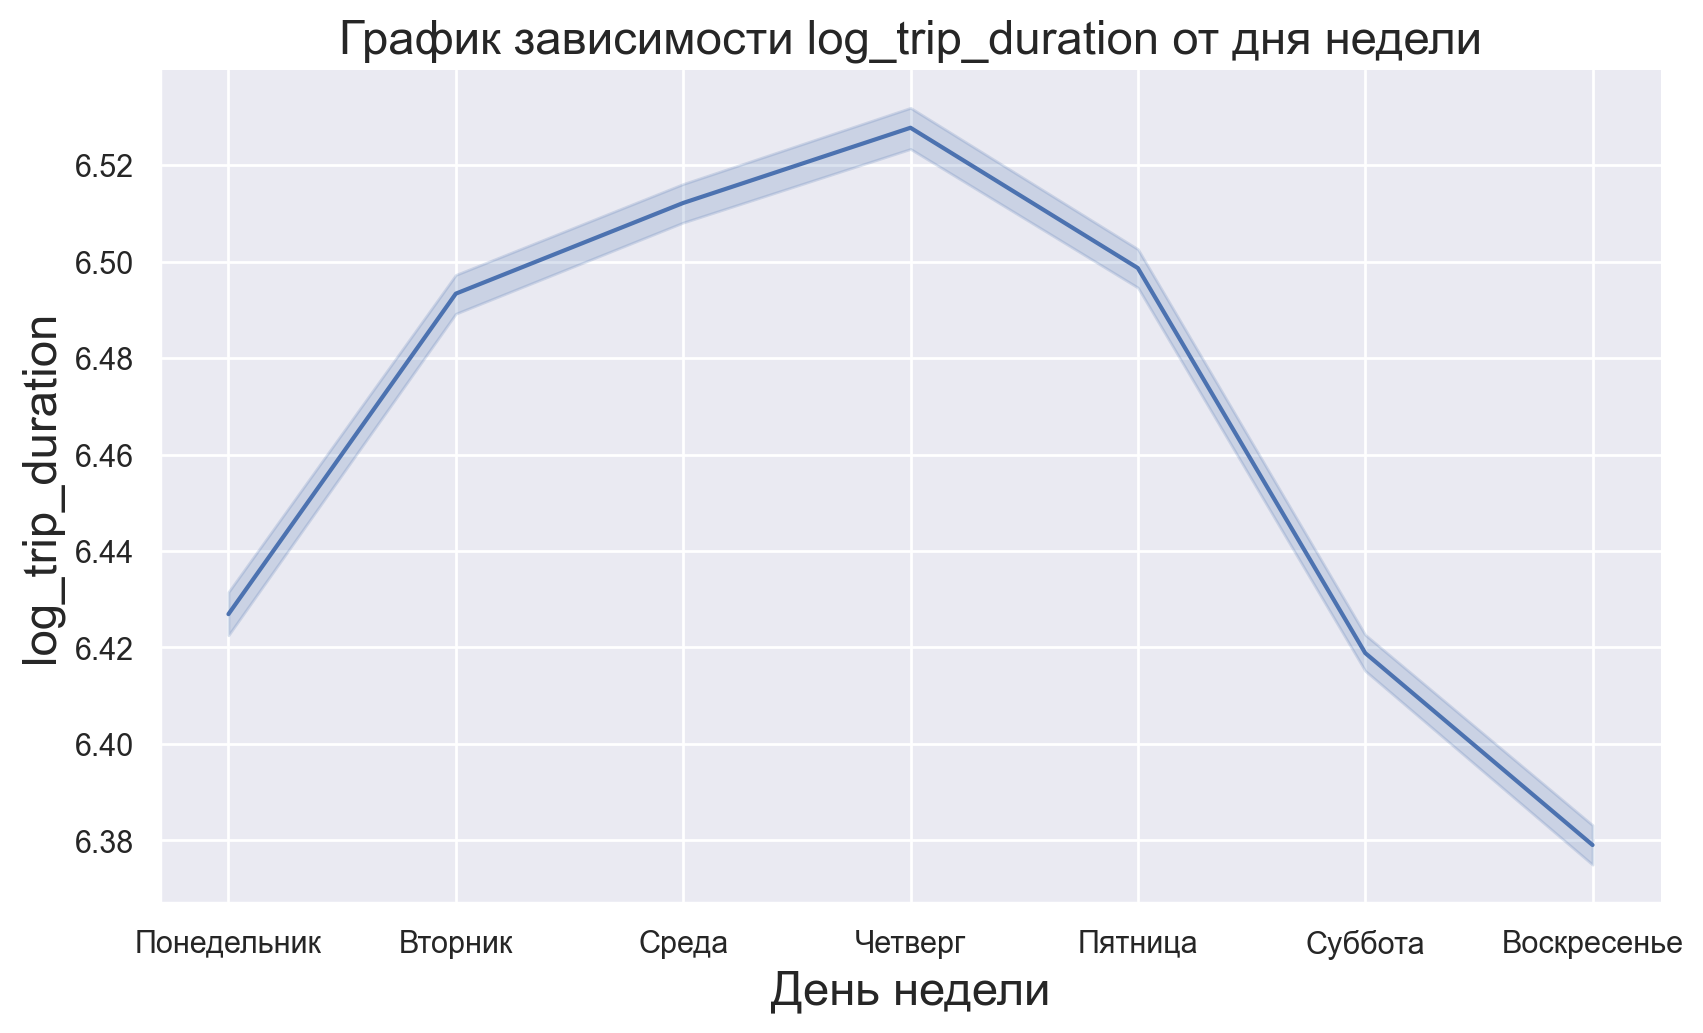

In [24]:
sns.relplot(x = 'WeekDay', y = 'log_trip_duration', kind='line', aspect=1.7, data=train_data)
plt.title("График зависимости log_trip_duration от дня недели", fontsize=17)
plt.xlabel("День недели", fontsize=17)
plt.ylabel("log_trip_duration", fontsize=17)
plt.xticks(ticks=np.arange(0, 7), labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()

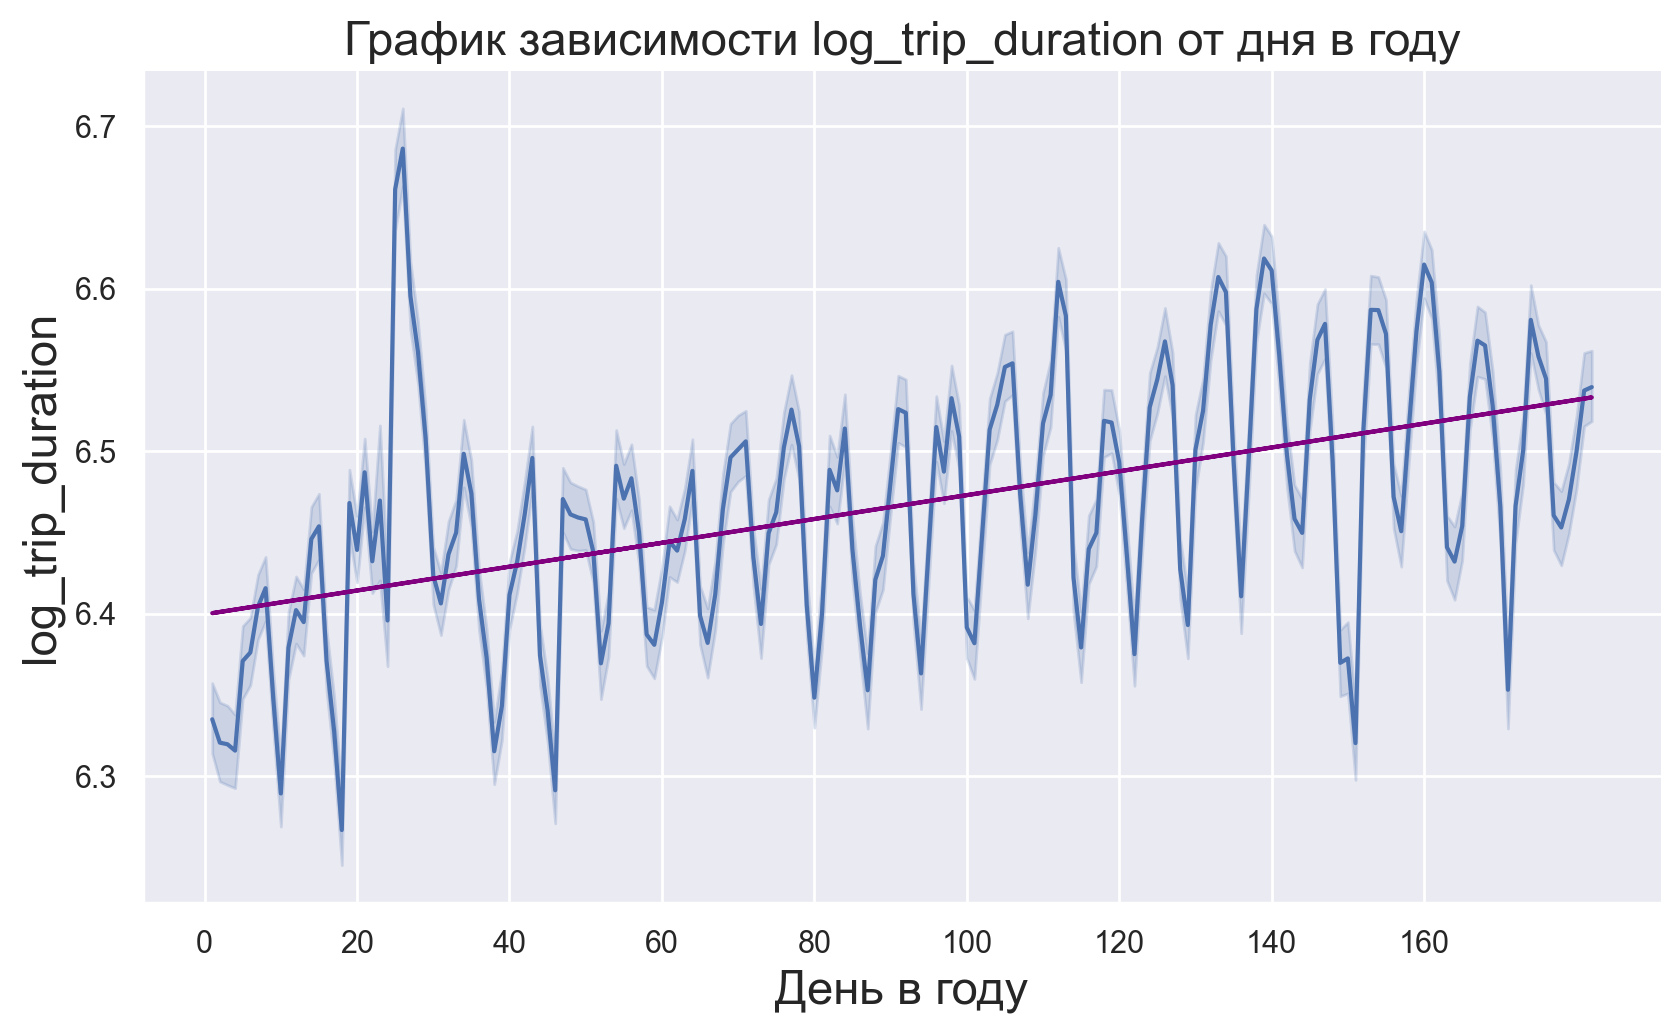

In [25]:
sns.relplot(x = 'YearDay', y = 'log_trip_duration', kind='line', aspect=1.7, data=train_data, )
plt.title("График зависимости log_trip_duration от дня в году", fontsize=17)
plt.xlabel("День в году", fontsize=17)
plt.ylabel("log_trip_duration", fontsize=17)
plt.xticks(ticks=np.arange(0, 180, 20))

#calculate equation for trendline
z = np.polyfit (train_data['YearDay'], train_data['log_trip_duration'], 1 )
p = np.poly1d (z)

#add trendline to plot
plt.plot (train_data['YearDay'], p(train_data['YearDay']), color="purple") 

plt.show()

**Ответ:** На самом деле эти графики очень похожи

В период снежной бури можно наблюдать значительный рост продолжительности поездки, что можно связывать с задержкой транспорта и ухудшением ситуации на дороге в бурю

В день поминовения - наоборот время поездок существенно падает

Также можем наблюдать четкое линейное увеличение продолжительности поездки с приближением к лету

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [91]:
X_train['Month'] = X_train['pickup_datetime'].dt.month
X_train['Hour'] = X_train['pickup_datetime'].dt.hour
X_train['WeekDay'] = X_train['pickup_datetime'].dt.weekday
X_train['YearDay'] = X_train['pickup_datetime'].dt.strftime('%j').astype(int)
X_train['Anomal'] = (X_train['YearDay'] == 151) | (X_train['YearDay'] == 23) | (X_train['YearDay'] == 24)

# добавляем соответствующие признаки и в валидационную выборку
X_valid['Month'] = X_valid['pickup_datetime'].dt.month
X_valid['Hour'] = X_valid['pickup_datetime'].dt.hour
X_valid['WeekDay'] = X_valid['pickup_datetime'].dt.weekday
X_valid['YearDay'] = X_valid['pickup_datetime'].dt.strftime('%j').astype(int)
X_valid['Anomal'] = (X_valid['YearDay'] == 151) | (X_valid['YearDay'] == 23) | (X_valid['YearDay'] == 24)

In [27]:
y_valid

571578     4.736198
1280332    7.619724
177838     7.502186
1433776    6.885510
757662     5.837730
             ...   
1042944    6.966024
85930      6.232448
61268      5.634790
251164     7.174724
1348190    6.244167
Name: log_trip_duration, Length: 437594, dtype: float64

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: все 5 новых перечисленных признаков следует рассматривать как категориальные, потому что мн-во их зачений значительно меньше общего размера выборки

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [28]:
categorical = ['Month', 'Hour', 'WeekDay', 'YearDay', 'Anomal']
numeric_features = ['pickup_longitude', 'pickup_latitude']

In [29]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_log_error

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(random_state=0))
])

ridge_pipeline.fit(X_train, y_train)
prediction = ridge_pipeline.predict(X_valid)
print(rmsle(y_valid, prediction))

0.7704157503662233


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [15]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [16]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [17]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Пункты прибытия в Аэропорт Кеннеди необходимо выделить, так как они создают выбросы по длительности путешествия

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [92]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train_data.loc[:, 'haversine'] = haversine_array(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)

In [247]:
train_data

id  vendor_id     pickup_datetime     dropoff_datetime  \
430252   id2968130          2 2016-02-15 00:52:17  2016-02-15 00:59:42   
598829   id2358444          2 2016-03-22 12:04:34  2016-03-22 12:23:43   
314731   id0408430          2 2016-03-14 16:03:08  2016-03-14 16:03:52   
1342009  id2305944          2 2016-01-14 12:02:41  2016-01-14 12:08:05   
673814   id2198653          1 2016-06-26 23:10:20  2016-06-26 23:17:38   
...            ...        ...                 ...                  ...   
359783   id1130068          2 2016-06-14 22:18:19  2016-06-14 22:29:42   
152315   id3416393          1 2016-03-12 20:53:19  2016-03-12 20:55:41   
963395   id2047807          1 2016-01-03 10:46:02  2016-01-03 11:02:37   
117952   id1634041          1 2016-03-04 08:18:24  2016-03-04 08:32:05   
305711   id3155472          2 2016-03-03 21:49:00  2016-03-03 21:55:27   

         passenger_count  pickup_longitude  pickup_latitude  \
430252                 2        -73.934586        40.797016   
598829                 2        -73.957748        40.764500   
314731                 1        -73.982857        40.730961   
1342009                1        -73.982262        40.771389   
673814                 1        -73.991264        40.749748   
...                  ...               ...              ...   
359783                 1        -73.872879        40.774052   
152315                 1        -73.985619        40.757359   
963395                 1        -73.994186        40.755886   
117952                 1        -73.982277        40.765305   
305711                 2        -74.005898        40.736099   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
430252          -73.917397         40.834545                  N   
598829          -73.978706         40.758430                  N   
314731          -73.980171         40.734741                  N   
1342009         -73.979973         40.786072                  N   
673814          -73.976517         40.749260                  N   
...                    ...               ...                ...   
359783          -73.925018         40.759640                  N   
152315          -73.987984         40.757030                  N   
963395          -74.016571         40.704746                  N   
117952          -73.973473         40.757809                  N   
305711          -73.995026         40.749981                  N   

         trip_duration  log_trip_duration  Month  Hour  WeekDay  YearDay  \
430252             445           6.100319      2     0        0       46   
598829            1149           7.047517      3    12        1       82   
314731              44           3.806662      3    16        0       74   
1342009            324           5.783825      1    12        3       14   
673814             438           6.084499      6    23        6      178   
...                ...                ...    ...   ...      ...      ...   
359783             683           6.527958      6    22        1      166   
152315             142           4.962845      3    20        5       72   
963395             995           6.903747      1    10        6        3   
117952             821           6.711740      3     8        4       64   
305711             387           5.961005      3    21        3       63   

         Anomal  haversine  
430252    False   4.416633  
598829    False   1.889749  
314731    False   0.477393  
1342009   False   1.643985  
673814    False   1.243496  
...         ...        ...  
359783    False   4.674257  
152315    False   0.202522  
963395    False   5.991147  
117952    False   1.115610  
305711    False   1.794859  

[1021050 rows x 18 columns]

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [93]:
train_data['log_haversine'] = np.log1p(train_data['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [94]:
your_df = train_data
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [33]:
train_data['haversine'] # расстояние в километрах

430252     4.416633
598829     1.889749
314731     0.477393
1342009    1.643985
673814     1.243496
             ...   
359783     4.674257
152315     0.202522
963395     5.991147
117952     1.115610
305711     1.794859
Name: haversine, Length: 1021050, dtype: float64

In [34]:
train_data['trip_duration'] # время в СЕКУНДАХ

430252      445
598829     1149
314731       44
1342009     324
673814      438
           ... 
359783      683
152315      142
963395      995
117952      821
305711      387
Name: trip_duration, Length: 1021050, dtype: int64

<Axes: ylabel='Count'>

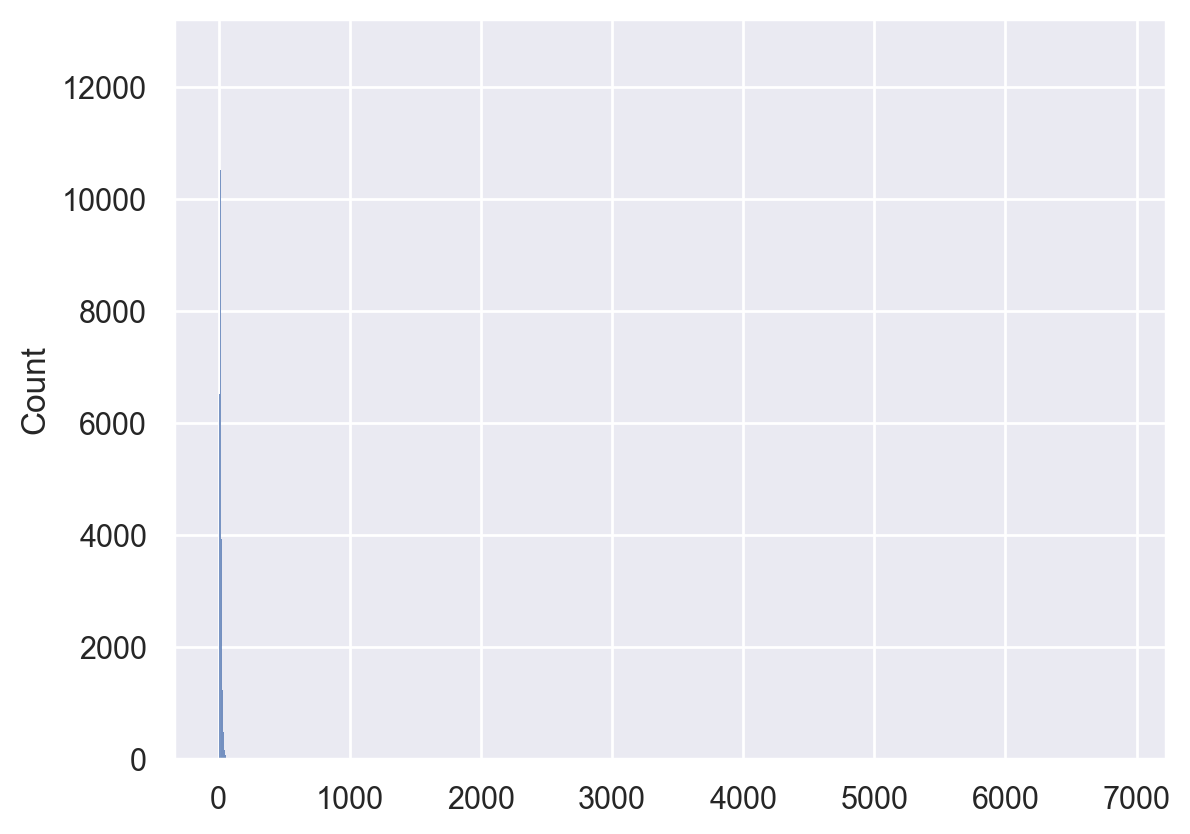

In [95]:
new = train_data['haversine'] / (train_data['trip_duration'] / 3600)
sns.histplot(new)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень большие значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: ylabel='Count'>

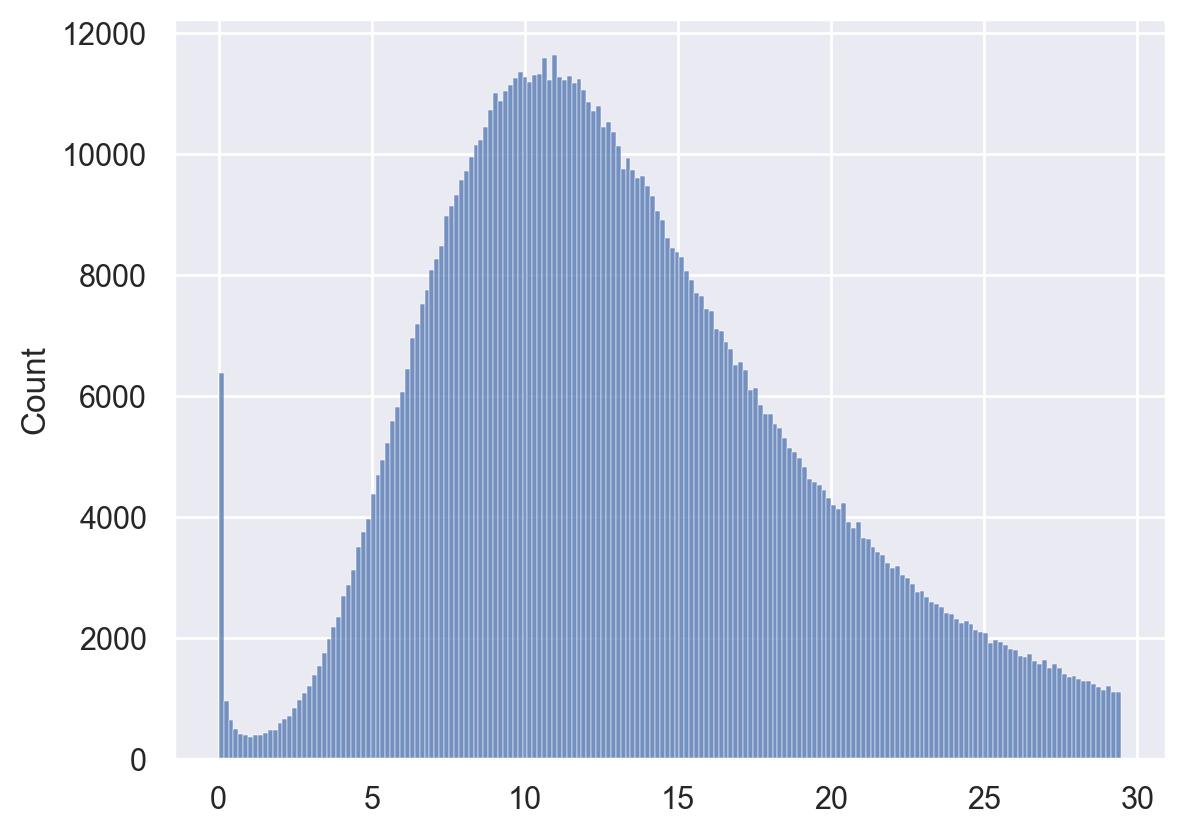

In [36]:
sns.histplot(new[new.lt(new.quantile(q=0.95))])

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<Axes: xlabel='Hour', ylabel='WeekDay'>

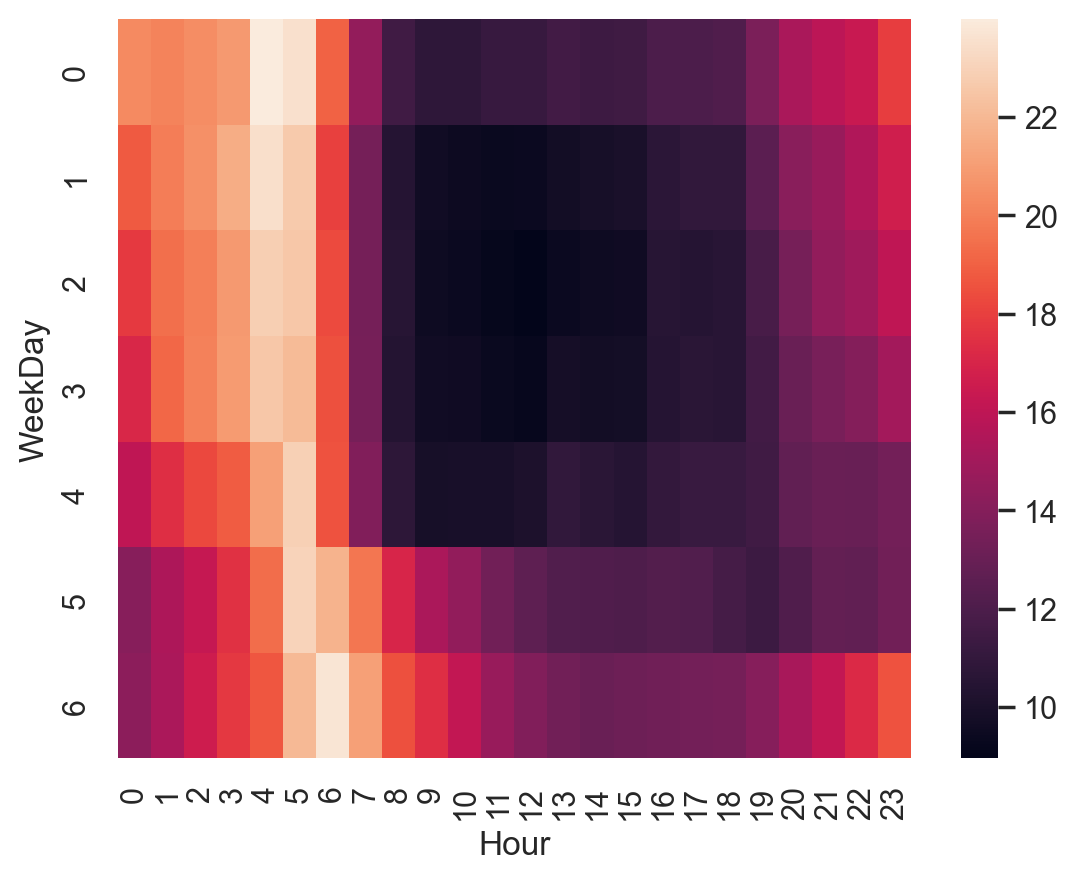

In [96]:
train_data['speed'] = new
pivot = train_data.pivot_table(values="speed", index="WeekDay", columns="Hour", aggfunc="median")
sns.heatmap(pivot)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Иначе, очев, модель переобучится и будет выдавать 100% качество на тренировочной выборке, но не на тестовой

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Максимальна в 4-5 часов, когда на дорогах меньше всего машин, и минимальна в час-пик

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [97]:
train_data['FreeRoad'] = ((train_data.WeekDay.isin([0, 1, 2, 3, 4])) & (train_data.Hour.isin([1, 2, 3, 4, 5, 6]))) | ((train_data.WeekDay.isin([5, 6])) & (train_data.Hour.isin([4, 5, 6, 7])))
train_data['RushHour'] = ((train_data.WeekDay.isin([0, 1, 2, 3, 4])) & (train_data.Hour.isin(np.arange(8, 20)))) | ((train_data.WeekDay.isin([5, 6])) & (train_data.Hour.isin(np.arange(13, 19))))

In [40]:
train_data.head(20)

id  vendor_id     pickup_datetime     dropoff_datetime  \
430252   id2968130          2 2016-02-15 00:52:17  2016-02-15 00:59:42   
598829   id2358444          2 2016-03-22 12:04:34  2016-03-22 12:23:43   
314731   id0408430          2 2016-03-14 16:03:08  2016-03-14 16:03:52   
1342009  id2305944          2 2016-01-14 12:02:41  2016-01-14 12:08:05   
673814   id2198653          1 2016-06-26 23:10:20  2016-06-26 23:17:38   
498297   id1126289          1 2016-02-09 09:59:08  2016-02-09 10:37:00   
1091257  id3825433          1 2016-04-16 12:42:42  2016-04-16 12:46:27   
465943   id2602166          1 2016-01-13 04:36:58  2016-01-13 04:48:29   
623580   id0519097          1 2016-01-10 20:39:18  2016-01-10 20:51:05   
727141   id1486420          1 2016-05-03 00:17:29  2016-05-03 00:22:15   
1385334  id2625403          1 2016-03-02 17:44:18  2016-03-02 18:08:28   
889830   id0756900          2 2016-01-19 14:12:58  2016-01-19 14:34:47   
253599   id0000169          1 2016-02-08 00:25:45  2016-02-08 00:28:24   
1309798  id1612884          1 2016-03-20 17:11:54  2016-03-20 17:21:24   
342582   id0642208          1 2016-04-10 11:20:17  2016-04-10 11:40:30   
981377   id0202485          2 2016-01-14 10:20:14  2016-01-14 10:37:51   
1431148  id0041604          2 2016-02-17 18:54:05  2016-02-17 19:10:08   
1267678  id2525889          1 2016-06-17 20:38:49  2016-06-17 21:02:59   
1447468  id1362899          2 2016-06-03 18:49:08  2016-06-03 19:07:31   
105311   id3259347          2 2016-01-30 14:01:03  2016-01-30 14:12:13   

         passenger_count  pickup_longitude  pickup_latitude  \
430252                 2        -73.934586        40.797016   
598829                 2        -73.957748        40.764500   
314731                 1        -73.982857        40.730961   
1342009                1        -73.982262        40.771389   
673814                 1        -73.991264        40.749748   
498297                 2        -73.862679        40.768925   
1091257                1        -73.981445        40.778656   
465943                 1        -74.001144        40.736496   
623580                 2        -73.997910        40.735256   
727141                 2        -73.998344        40.729698   
1385334                1        -73.972137        40.759369   
889830                 6        -73.989822        40.757278   
253599                 1        -73.987595        40.755516   
1309798                1        -73.873138        40.774044   
342582                 2        -73.959686        40.782719   
981377                 1        -73.962807        40.775295   
1431148                1        -73.973457        40.763359   
1267678                2        -73.961182        40.760735   
1447468                2        -73.939140        40.805130   
105311                 1        -73.986763        40.761581   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  Month  \
430252          -73.917397         40.834545                  N  ...      2   
598829          -73.978706         40.758430                  N  ...      3   
314731          -73.980171         40.734741                  N  ...      3   
1342009         -73.979973         40.786072                  N  ...      1   
673814          -73.976517         40.749260                  N  ...      6   
498297          -73.975845         40.791676                  N  ...      2   
1091257         -73.967026         40.797642                  N  ...      4   
465943          -73.964668         40.753429                  N  ...      1   
623580          -74.008247         40.707912                  N  ...      1   
727141          -73.988907         40.725994                  N  ...      5   
1385334         -73.999550         40.734100                  Y  ...      3   
889830          -73.965271         40.759411                  N  ...      1   
253599          -73.996269         40.747398                  N  ...      2   
1309798         -73.913330     

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [41]:
# Тяжелооо

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='FreeRoad', ylabel='log_trip_duration'>

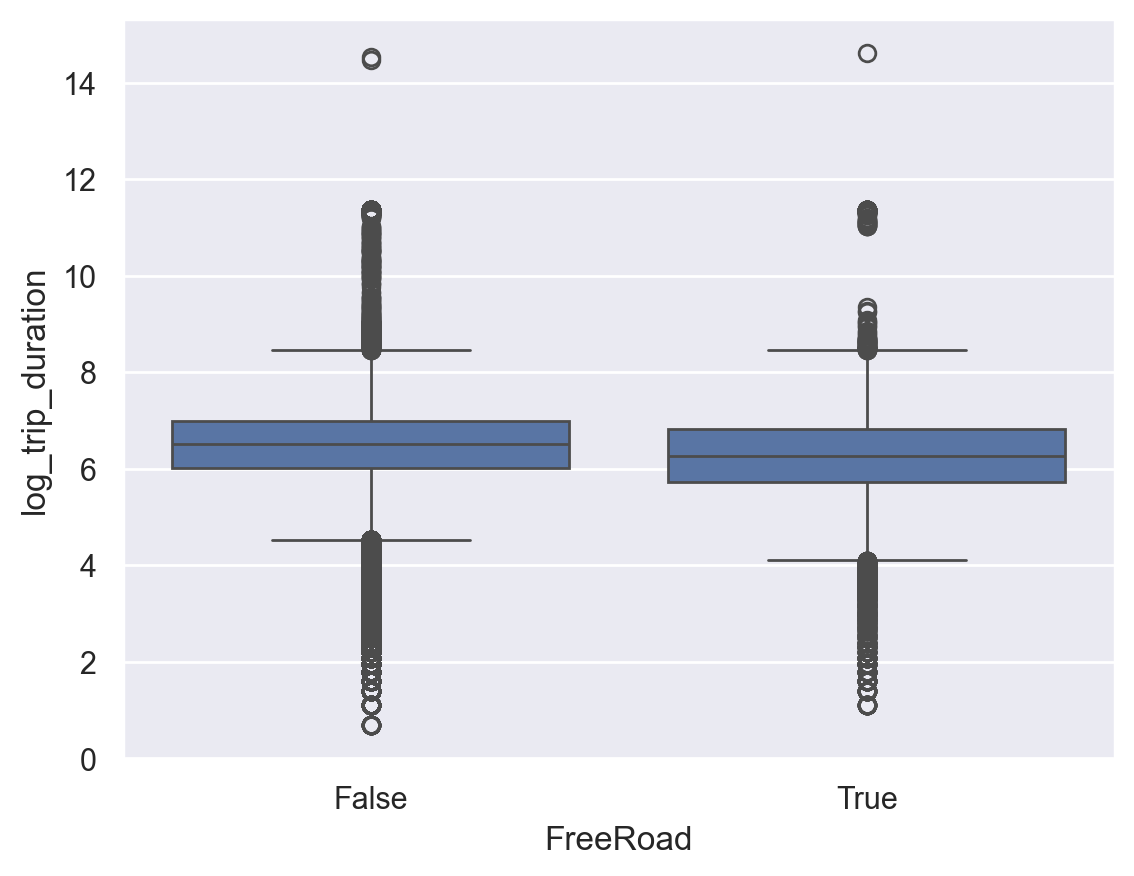

In [42]:
sns.boxplot(data=train_data, x = 'FreeRoad', y = 'log_trip_duration')

<Axes: xlabel='RushHour', ylabel='log_trip_duration'>

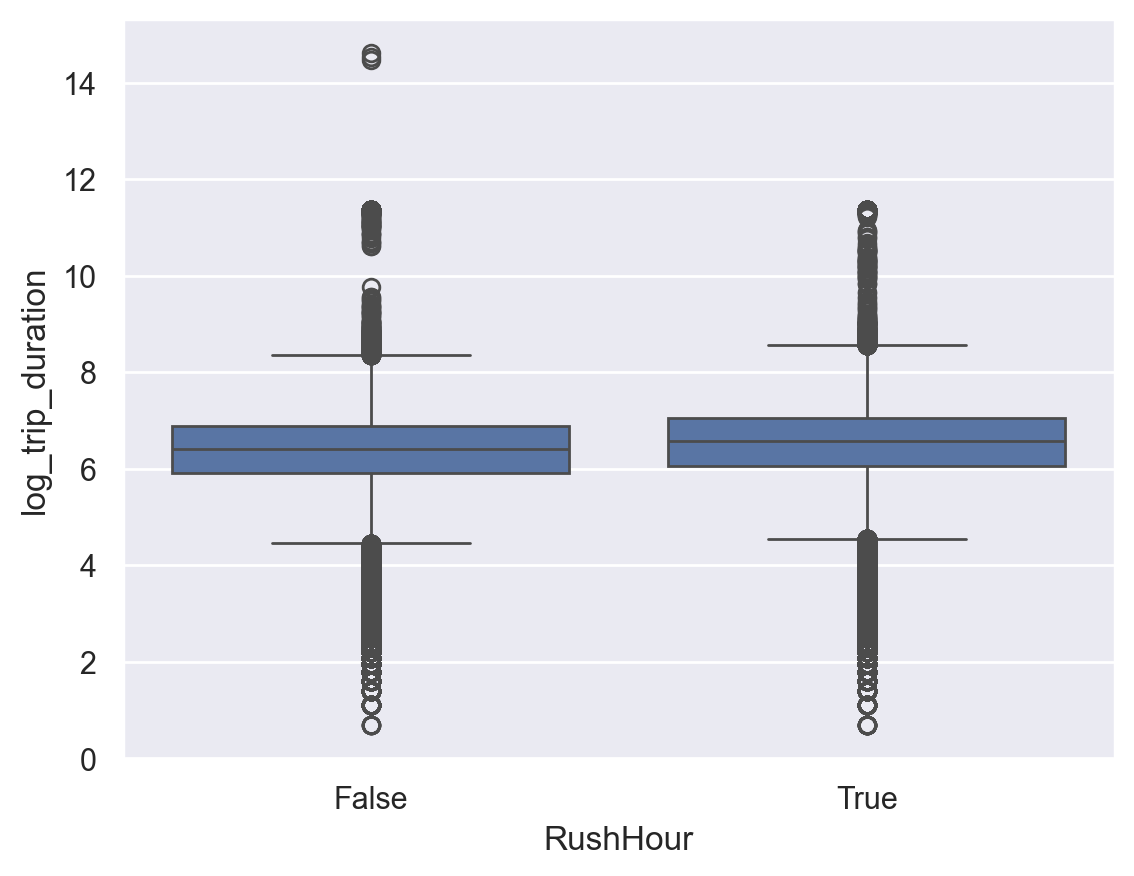

In [43]:
sns.boxplot(data=train_data, x = 'RushHour', y = 'log_trip_duration')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Не очень ;(((((

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [261]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass
    
    def show_map(self):
        # you may want to visualize cells
        pass
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

SyntaxError: invalid syntax (3951019751.py, line 8)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [44]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'Month', 'Hour', 'WeekDay',
       'YearDay', 'Anomal', 'haversine', 'log_haversine', 'speed', 'FreeRoad',
       'RushHour'],
      dtype='object')

In [45]:
categorical = ['Month', 'Hour', 'WeekDay', 'YearDay', 'Anomal', 'FreeRoad', 'RushHour'] 
numeric_features = ['pickup_longitude', 'pickup_latitude'] # скорость не используем, так как она зависит от расстояния, а оно кореллирует с ответом

In [98]:
X_valid['FreeRoad'] = ((X_valid.WeekDay.isin([0, 1, 2, 3, 4])) & (X_valid.Hour.isin([1, 2, 3, 4, 5, 6]))) | ((X_valid.WeekDay.isin([5, 6])) & (X_valid.Hour.isin([4, 5, 6, 7])))
X_valid['RushHour'] = ((X_valid.WeekDay.isin([0, 1, 2, 3, 4])) & (X_valid.Hour.isin(np.arange(8, 20)))) | ((X_valid.WeekDay.isin([5, 6])) & (X_valid.Hour.isin(np.arange(13, 19))))

X_train['FreeRoad'] = ((X_train.WeekDay.isin([0, 1, 2, 3, 4])) & (X_train.Hour.isin([1, 2, 3, 4, 5, 6]))) | ((X_train.WeekDay.isin([5, 6])) & (X_train.Hour.isin([4, 5, 6, 7])))
X_train['RushHour'] = ((X_train.WeekDay.isin([0, 1, 2, 3, 4])) & (X_train.Hour.isin(np.arange(8, 20)))) | ((X_train.WeekDay.isin([5, 6])) & (X_train.Hour.isin(np.arange(13, 19))))

In [99]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(random_state=0))
])

ridge_pipeline.fit(X_train, y_train)
prediction = ridge_pipeline.predict(X_valid)
print('Текущая оценка: %.8f' % rmsle(y_valid, prediction))

Текущая оценка: 0.76839792


Предыдущая оценка: 0.77041575036, видим, что качество выросло менее чем на 0.0012, что немного, но это честная работа)))

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: скорость водителя будет зависить от компании, так как одна занимается просто такси, а вторая лимузинами, и, очевидно, скорость лимузинов меньше скорости такси; число пассажиров тоже может влиять, чем больше пассажиров тем дальше потребуется ехать водителю, чтобы всех доставить, а также при числе пассажиров > 4 это уже будет лимузин, а не такси; если машина находилась вне зоны доступа сети, значит, скорее всего, она была за городом, что тоже влияет на длину поездки

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [48]:
print(len(train_data.vendor_id.unique()))
print(len(train_data.passenger_count.unique()))
print(len(train_data.store_and_fwd_flag.unique()))

2
10
2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
sns.boxplot(data=train_data, x = 'vendor_id', y = 'log_trip_duration')

In [ ]:
sns.boxplot(data=train_data, x = 'passenger_count', y = 'log_trip_duration')

In [ ]:
sns.boxplot(data=train_data, x = 'store_and_fwd_flag', y = 'log_trip_duration')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [100]:
train_data['vendor_id'] = (train_data.vendor_id == 2)
train_data['store_and_fwd_flag'] = (train_data.store_and_fwd_flag == 'Y')

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Нет, они не внесут большого вклада в обучение

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [101]:
categorical = ['Month', 'Hour', 'WeekDay', 'YearDay', 'Anomal', 'FreeRoad', 'RushHour', 'store_and_fwd_flag', 'vendor_id', 'passenger_count'] 
numeric_features = ['pickup_longitude', 'pickup_latitude']

In [102]:
X_train['vendor_id'] = (X_train.vendor_id == 2)
X_train['store_and_fwd_flag'] = (X_train.store_and_fwd_flag == 'Y')

X_valid['vendor_id'] = (X_valid.vendor_id == 2)
X_valid['store_and_fwd_flag'] = (X_valid.store_and_fwd_flag == 'Y')

In [103]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(random_state=0))
])

ridge_pipeline.fit(X_train, y_train)
prediction = ridge_pipeline.predict(X_valid)
print('Текущая оценка: %.8f' % rmsle(y_valid, prediction))

Текущая оценка: 0.76850997


На удивление, добавление данных признаков внесло значительный вклад в метрику! (я был не прав :( )
Прошлая оценка: 0.76925437

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [120]:
new_X_train = X_train.copy()
new_y_train = y_train.copy()

In [121]:
stayed = X_train['speed'] <= 90
new_X_train = new_X_train.loc[stayed] # убираем машины двигающиеся со средней скоростью больше 90 км/ч (все таки для города это странновато)\
new_y_train = new_y_train[stayed]

<Axes: xlabel='haversine', ylabel='Count'>

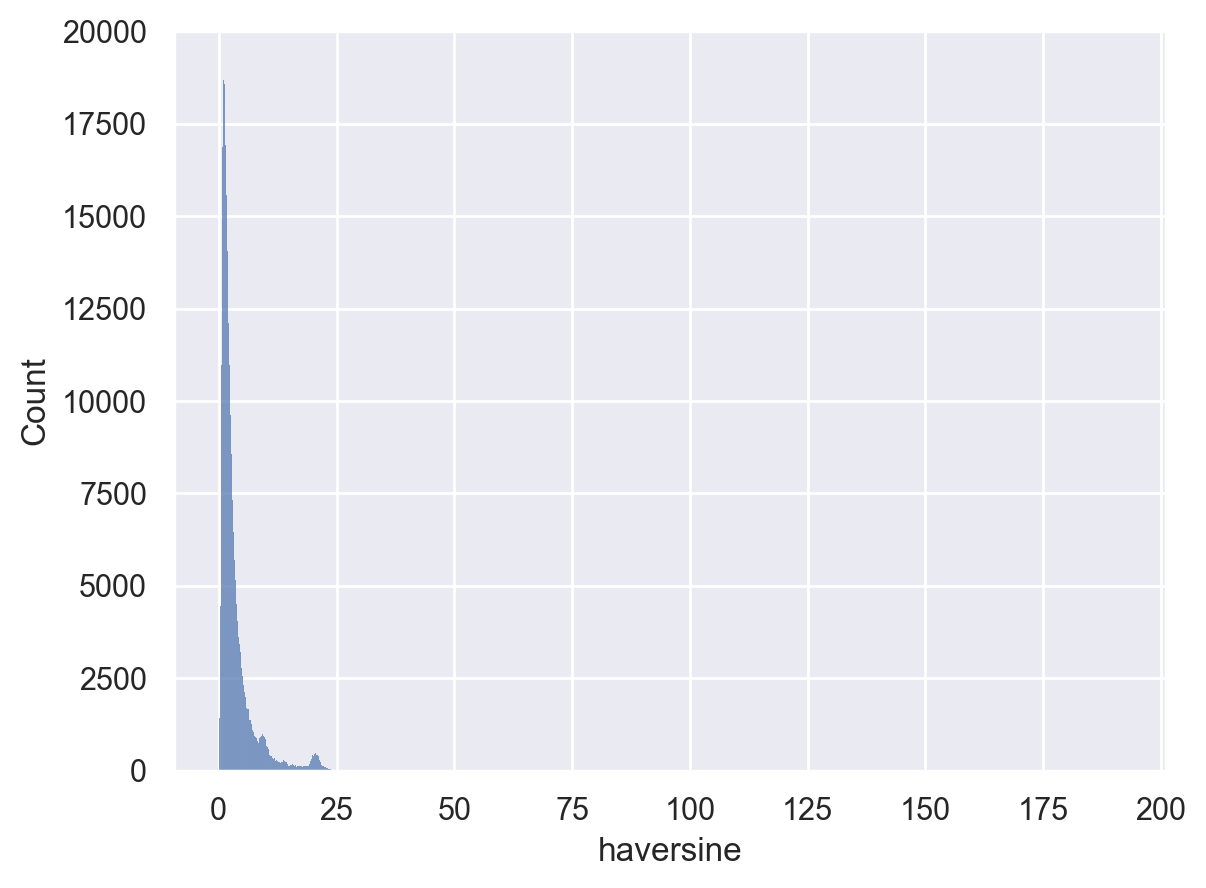

In [225]:
sns.histplot(X_train['haversine'])

Тут я пытался убрать выбросы по расстоянию, но по какой-то интересной причине это лишь ухудшало оценку, что ж оставим их тогда)

In [122]:
stayed = new_X_train['haversine'] <= 30
new_X_train = new_X_train.loc[stayed]
new_y_train = new_y_train[stayed]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [123]:
new_X_train.loc[new_X_train['passenger_count'] > 5].shape[0] # 33849 значительно меньше 1 млн, так что можем считать число пассажиров большее 5 редким

33841

In [124]:
new_X_train.loc[new_X_train['passenger_count'] > 5, ['passenger_count']] = 6

In [88]:
X_train.describe()

pickup_datetime  passenger_count  pickup_longitude  \
count                        1021050     1.021050e+06      1.021050e+06   
mean   2016-04-01 10:40:25.281081344     1.664059e+00     -7.397350e+01   
min              2016-01-01 00:00:53     0.000000e+00     -1.219333e+02   
25%    2016-02-17 17:06:25.750000128     1.000000e+00     -7.399186e+01   
50%              2016-04-01 18:24:26     1.000000e+00     -7.398173e+01   
75%    2016-05-15 04:02:19.750000128     2.000000e+00     -7.396732e+01   
max              2016-06-30 23:59:39     6.000000e+00     -6.133553e+01   
std                              NaN     1.313942e+00      8.050290e-02   

       pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
count     1.021050e+06       1.021050e+06      1.021050e+06   1.021050e+06   
mean      4.075091e+01      -7.397342e+01      4.075178e+01   9.611859e+02   
min       3.435970e+01      -1.219333e+02      3.218114e+01   1.000000e+00   
25%       4.073737e+01      -7.399131e+01      4.073589e+01   3.970000e+02   
50%       4.075413e+01      -7.397974e+01      4.075452e+01   6.620000e+02   
75%       4.076836e+01      -7.396301e+01      4.076979e+01   1.076000e+03   
max       4.437194e+01      -6.133553e+01      4.392103e+01   2.227612e+06   
std       3.222079e-02       8.025334e-02      3.661241e-02   4.784929e+03   

       log_trip_duration         Month          Hour       WeekDay  \
count       1.021050e+06  1.021050e+06  1.021050e+06  1.021050e+06   
mean        6.466888e+00  3.517609e+00  1.360981e+01  3.050927e+00   
min         6.931472e-01  1.000000e+00  0.000000e+00  0.000000e+00   
25%         5.986452e+00  2.000000e+00  9.000000e+00  1.000000e+00   
50%         6.496775e+00  4.000000e+00  1.400000e+01  3.000000e+00   
75%         6.981935e+00  5.000000e+00  1.900000e+01  5.000000e+00   
max         1.461644e+01  6.000000e+00  2.300000e+01  6.000000e+00   
std         7.967243e-01  1.680810e+00  6.399160e+00  1.954072e+00   

            YearDay     haversine  log_haversine         speed  
count  1.021050e+06  1.021050e+06   1.021050e+06  1.021050e+06  
mean   9.185677e+01  3.440184e+00   1.254423e+00  1.441505e+01  
min    1.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  
25%    4.800000e+01  1.230780e+00   8.023514e-01  9.117158e+00  
50%    9.200000e+01  2.093190e+00   1.129203e+00  1.278948e+01  
75%    1.360000e+02  3.877489e+00   1.584630e+00  1.784860e+01  
max    1.820000e+02  8.912141e+02   6.793706e+00  6.877340e+03  
std    5.156085e+01  4.210882e+00   6.272076e-01  1.308633e+01

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [125]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(random_state=1))
])

ridge_pipeline.fit(new_X_train, new_y_train)
prediction = ridge_pipeline.predict(X_valid)
print('Текущая оценка: %.8f' % rmsle(y_valid, prediction))

Текущая оценка: 0.76906346


Предыдущая 0.76850997 ыыыауауэыы

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

**Ответ**: будет добавлено 'число уникальных' - 'всего число категориальных', т.е.:

In [130]:
np.array([new_X_train[i].nunique() for i in categorical]).sum() - len(categorical)

np.int64(224)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [131]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(random_state=0))
])

ridge_pipeline.fit(X_train, y_train)
prediction = ridge_pipeline.predict(X_valid)
print('Текущая оценка: %.8f' % rmsle(y_valid, prediction))

Текущая оценка: 0.79350383


Видим, что Ridge лучше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

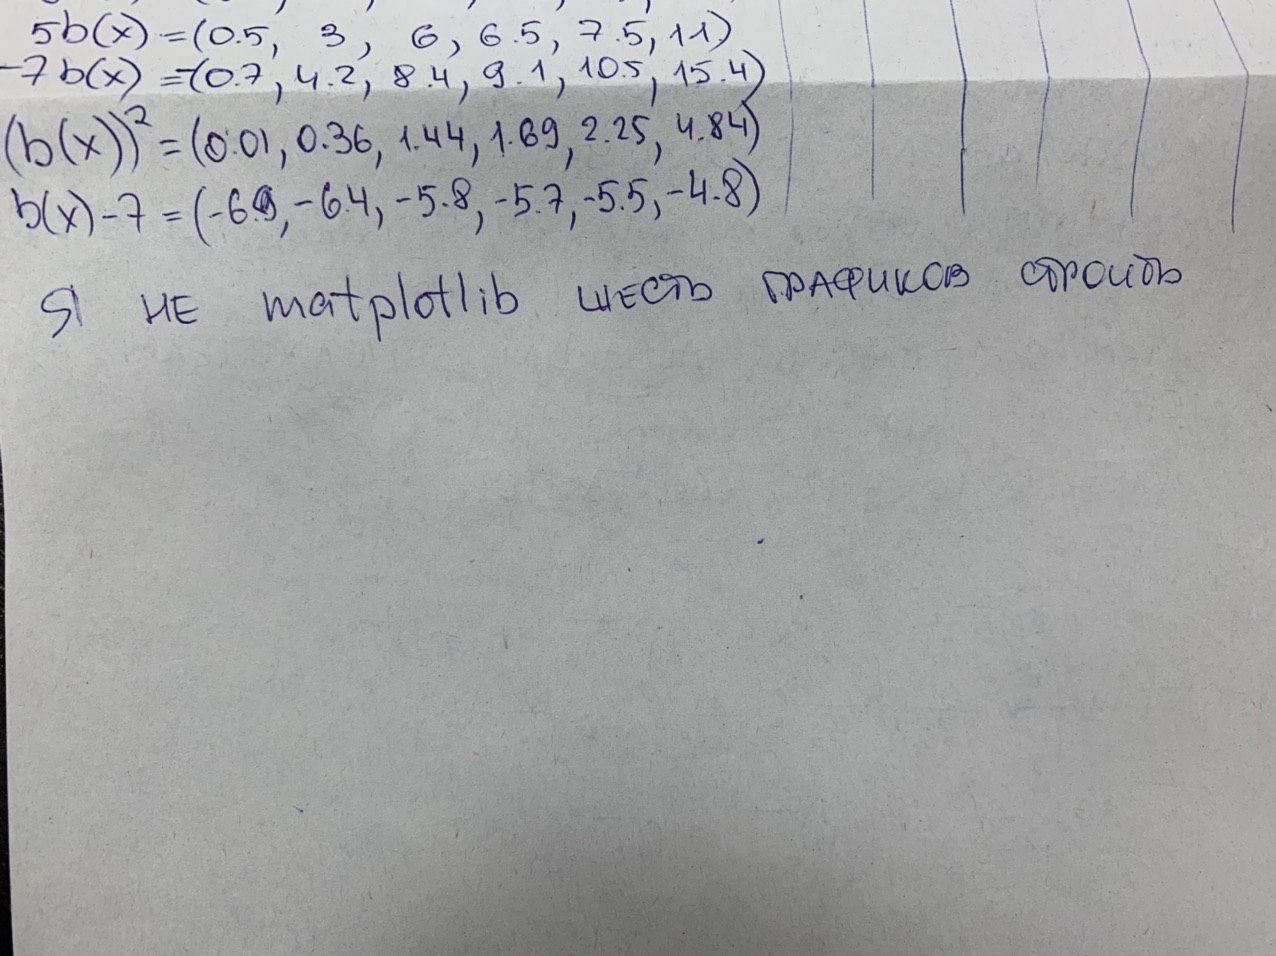